In [4]:
%pip install simpy

import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Constants
RANDOM_SEED = 42
CUSTOMER_ARRIVAL_RATE = 3  # Customers per minute (Poisson distribution)
SERVICE_TIME_MEAN = 5  # Mean service time in minutes (Exponential distribution)
SIMULATION_TIME = 240  # Total simulation time in minutes (4 hours)

In [6]:
class TravelokaQueueSystem:
    def __init__(self, env, num_agents):
        self.env = env
        self.agents = simpy.Resource(env, num_agents)
        self.waiting_times = []
        self.service_times = []

    def serve_customer(self, customer_id):
        service_time = random.expovariate(1.0 / SERVICE_TIME_MEAN)
        self.service_times.append(service_time)
        yield self.env.timeout(service_time)
        waiting_time = self.env.now - self.arrival_time
        self.waiting_times.append(waiting_time)
        print(f"Customer {customer_id} served at {self.env.now:.2f} minutes (Wait: {waiting_time:.2f} mins, Service: {service_time:.2f} mins)")

    def customer_arrival(self):
        customer_id = 0
        while True:
            inter_arrival_time = random.expovariate(CUSTOMER_ARRIVAL_RATE)
            yield self.env.timeout(inter_arrival_time)
            customer_id += 1
            self.arrival_time = self.env.now
            print(f"Customer {customer_id} arrived at {self.env.now:.2f} minutes")

            with self.agents.request() as request:
                yield request
                yield self.env.process(self.serve_customer(customer_id))

In [7]:
# Running the Simulation
def run_simulation(num_agents):
    random.seed(RANDOM_SEED)
    env = simpy.Environment()
    system = TravelokaQueueSystem(env, num_agents)
    env.process(system.customer_arrival())
    env.run(until=SIMULATION_TIME)

    avg_waiting_time = np.mean(system.waiting_times)
    system_utilization = (sum(system.service_times) / (num_agents * SIMULATION_TIME)) * 100
    print("\nSimulation Results")
    print(f"Number of Agents: {num_agents}")
    print(f"Average Waiting Time: {avg_waiting_time:.2f} mins")
    print(f"System Utilization: {system_utilization:.2f}%")
    return avg_waiting_time, system_utilization


Running simulation with 1 agents...
Customer 1 arrived at 0.34 minutes
Customer 1 served at 0.47 minutes (Wait: 0.13 mins, Service: 0.13 mins)
Customer 2 arrived at 0.57 minutes
Customer 2 served at 1.84 minutes (Wait: 1.26 mins, Service: 1.26 mins)
Customer 3 arrived at 2.28 minutes
Customer 3 served at 7.93 minutes (Wait: 5.65 mins, Service: 5.65 mins)
Customer 4 arrived at 8.67 minutes
Customer 4 served at 9.12 minutes (Wait: 0.45 mins, Service: 0.45 mins)
Customer 5 arrived at 9.31 minutes
Customer 5 served at 9.46 minutes (Wait: 0.15 mins, Service: 0.15 mins)
Customer 6 arrived at 9.54 minutes
Customer 6 served at 13.06 minutes (Wait: 3.52 mins, Service: 3.52 mins)
Customer 7 arrived at 13.07 minutes
Customer 7 served at 14.18 minutes (Wait: 1.11 mins, Service: 1.11 mins)
Customer 8 arrived at 14.53 minutes
Customer 8 served at 18.46 minutes (Wait: 3.94 mins, Service: 3.94 mins)
Customer 9 arrived at 18.55 minutes
Customer 9 served at 23.00 minutes (Wait: 4.45 mins, Service: 4.45

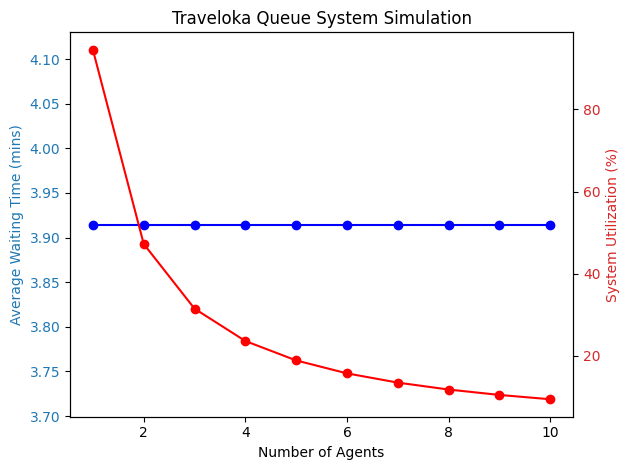

In [8]:
if __name__ == "__main__":
    agents_range = range(1, 11)
    avg_waiting_times = []
    utilizations = []

    for agents in agents_range:
        print(f"\nRunning simulation with {agents} agents...")
        avg_wait, utilization = run_simulation(agents)
        avg_waiting_times.append(avg_wait)
        utilizations.append(utilization)

    # Visualization
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Number of Agents')
    ax1.set_ylabel('Average Waiting Time (mins)', color='tab:blue')
    ax1.plot(agents_range, avg_waiting_times, 'bo-', label='Avg Waiting Time')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('System Utilization (%)', color='tab:red')
    ax2.plot(agents_range, utilizations, 'ro-', label='System Utilization')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title('Traveloka Queue System Simulation')
    fig.tight_layout()
    plt.show()